In [18]:
import pandas as pd
import numpy as np
import datetime
import requests
import warnings
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify
import plotly.offline as py
import plotly_express as px

%matplotlib inline

In [19]:
age_details = pd.read_csv('New_Data/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('New_Data/covid_19_india.csv')
hospital_beds = pd.read_csv('New_Data/HospitalBedsIndia.csv')
individual_details = pd.read_csv('New_Data/IndividualDetails.csv')
ICMR_details = pd.read_csv('New_Data/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('New_Data/ICMRTestingLabs.csv')
state_testing = pd.read_csv('New_Data/StatewiseTestingDetails.csv')

In [20]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'])
state_testing['Date'] = pd.to_datetime(state_testing['Date'])

In [21]:
india_covid_19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [22]:
print(age_details.info())
age_details.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes
None


,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


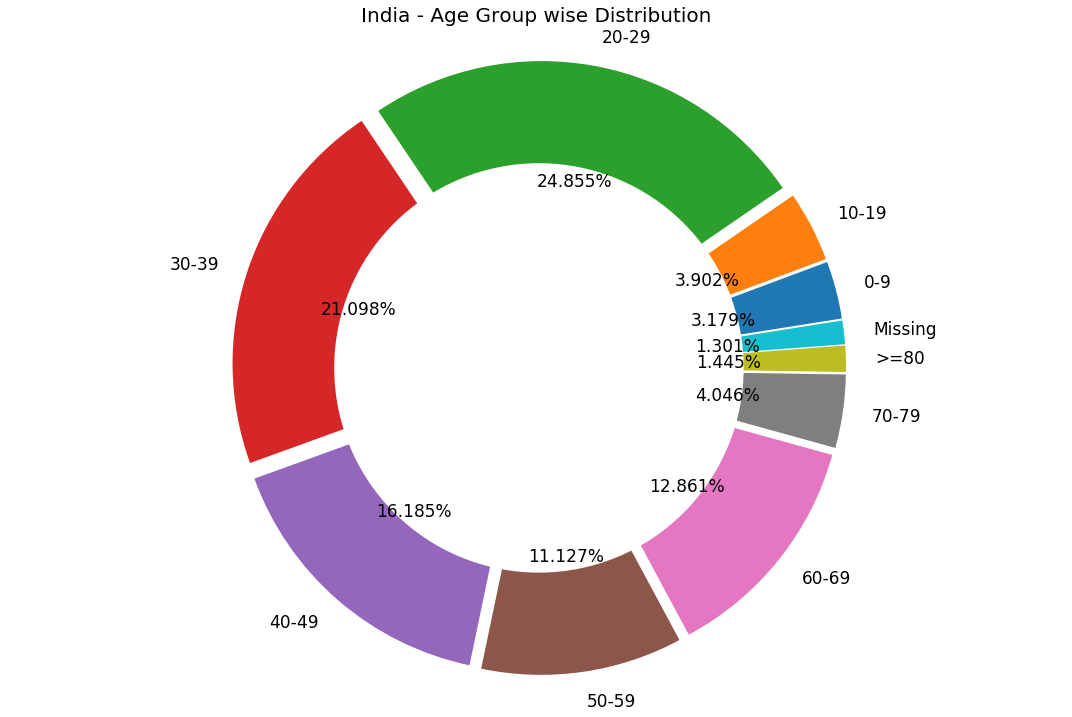

In [23]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%2.3f%%', startangle=9, explode =explode,textprops={'fontsize': 17})
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

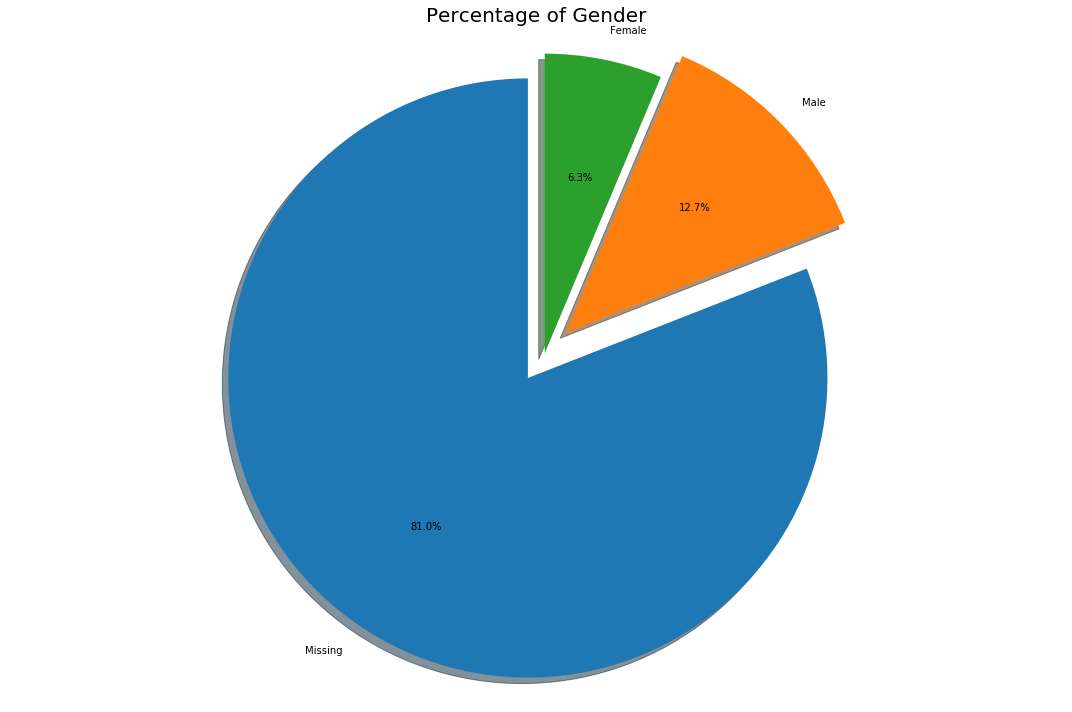

In [24]:
labels = ['Missing', 'Male', 'Female']
sizes = []
sizes.append(individual_details['gender'].isnull().sum())
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0.1, 0.1, 0.0)

plt.figure(figsize= (15,10))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

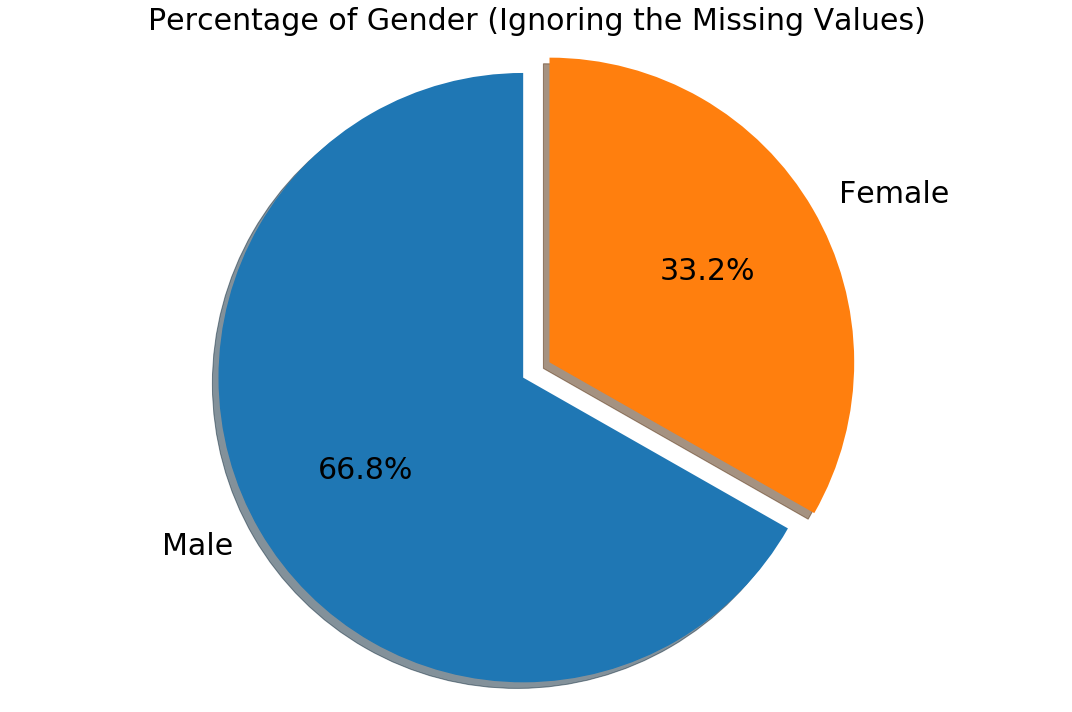

In [25]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0.1, 0)

plt.figure(figsize= (15,10))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 30})

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 30)
plt.axis('equal')
plt.tight_layout()

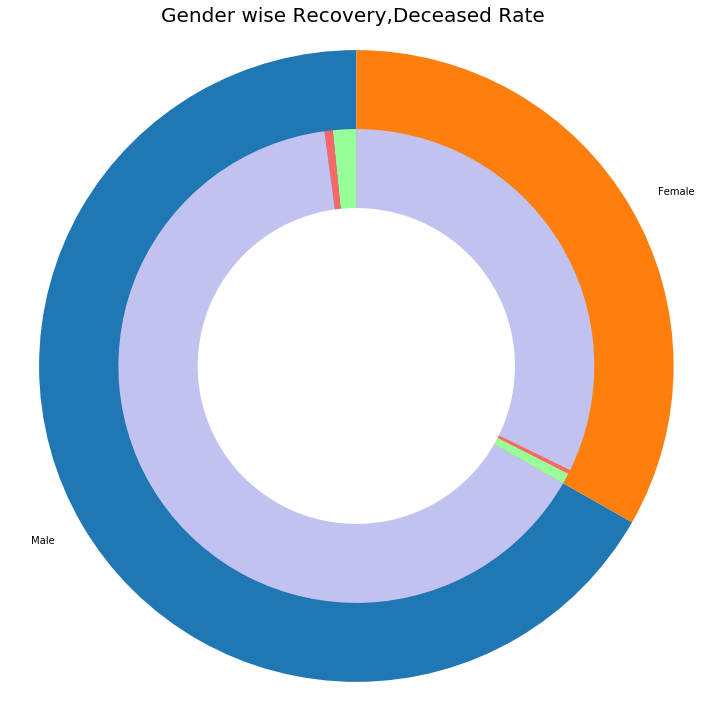

In [26]:
gender_group = individual_details.groupby('gender')

labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

labels_status = ['Recovered','Deceased','Hospitalized','Recovered','Deceased','Hospitalized']

sizes_status = []
sizes_status.append(list(gender_group.get_group('M')['current_status'].value_counts())[1])
sizes_status.append(list(gender_group.get_group('M')['current_status'].value_counts())[2])
sizes_status.append(list(gender_group.get_group('M')['current_status'].value_counts())[0])
sizes_status.append(list(gender_group.get_group('F')['current_status'].value_counts())[1])
sizes_status.append(list(gender_group.get_group('F')['current_status'].value_counts())[2])
sizes_status.append(list(gender_group.get_group('F')['current_status'].value_counts())[0])

colors_status = ['#99ff99','#ff6666', '#c2c2f0','#99ff99','#ff6666', '#c2c2f0']

plt.figure(figsize= (10,10))
plt.pie(sizes, labels=labels, startangle=90,frame=True)
plt.pie(sizes_status,colors=colors_status,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Gender wise Recovery,Deceased Rate ',fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [27]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

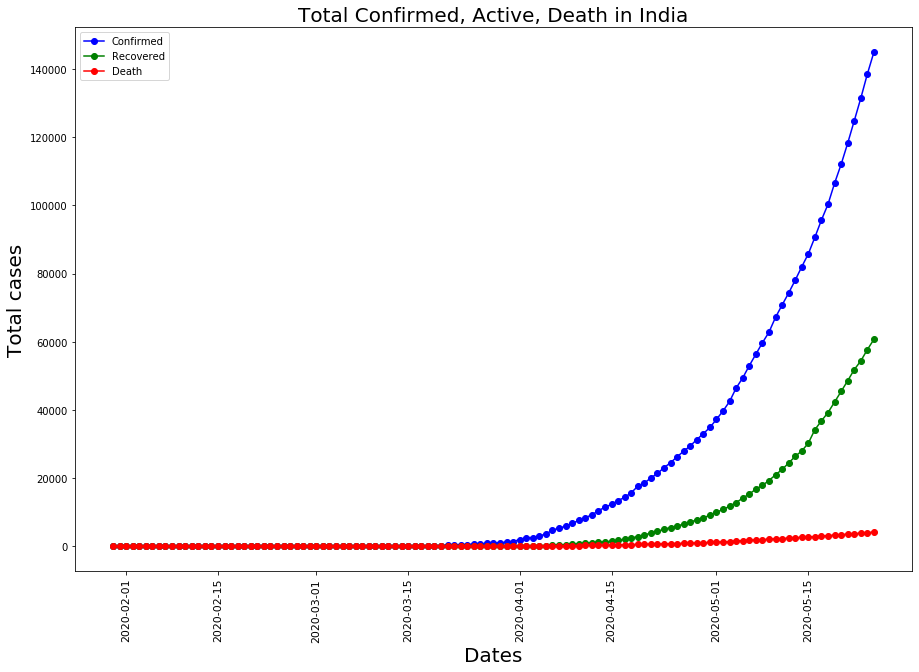

In [28]:
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend();

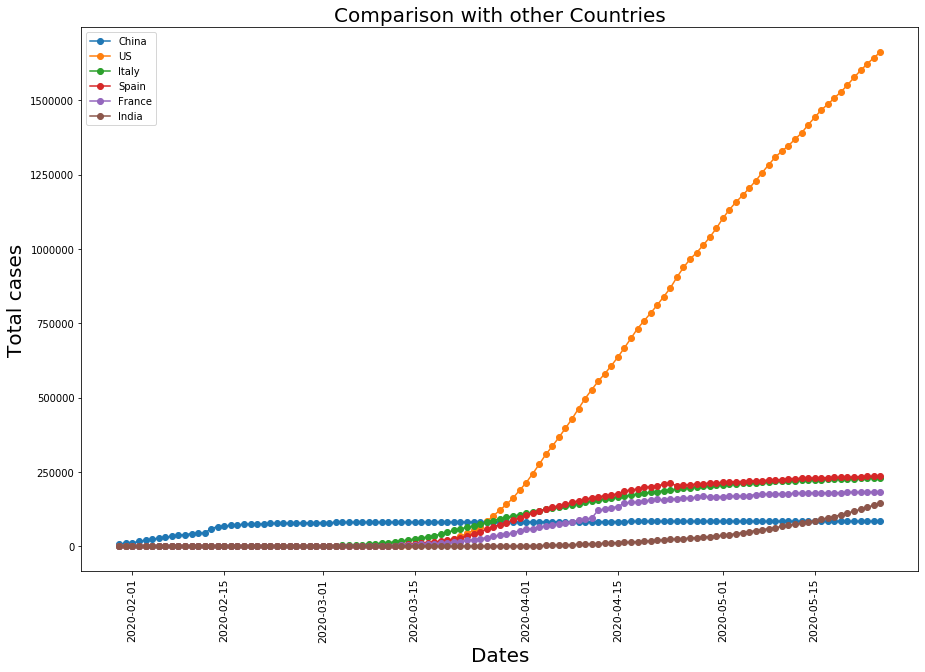

In [29]:
countries = ['China','US', 'Italy', 'Spain', 'France','India']

global_confirmed = []
global_recovered = []
global_deaths = []
global_active = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i],linestyle ='-')
plt.legend();



In [30]:
state_details = pd.pivot_table(india_covid_19, values=['Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['Cured'] / state_details['Confirmed'],2)
state_details['Death Rate'] = round(state_details['Deaths'] /state_details['Confirmed'], 2)
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='Blues')

C:\Users\jaswanth sai\anaconda3\envs\nikhil\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning:

invalid value encountered in less



,Confirmed,Cured,Deaths,Recovery Rate,Death Rate
State/UnionTerritory,,,,,
Maharashtra,33053,7688,1198,0.230000,0.040000
Gujarat,11379,4499,659,0.400000,0.060000
Tamil Nadu,11224,4172,78,0.370000,0.010000
Delhi,10054,4485,160,0.450000,0.020000
Rajasthan,5202,2992,131,0.580000,0.030000
Madhya Pradesh,4977,2403,248,0.480000,0.050000
Uttar Pradesh,4259,2441,104,0.570000,0.020000
West Bengal,2677,959,238,0.360000,0.090000
Andhra Pradesh,2407,1456,50,0.600000,0.020000


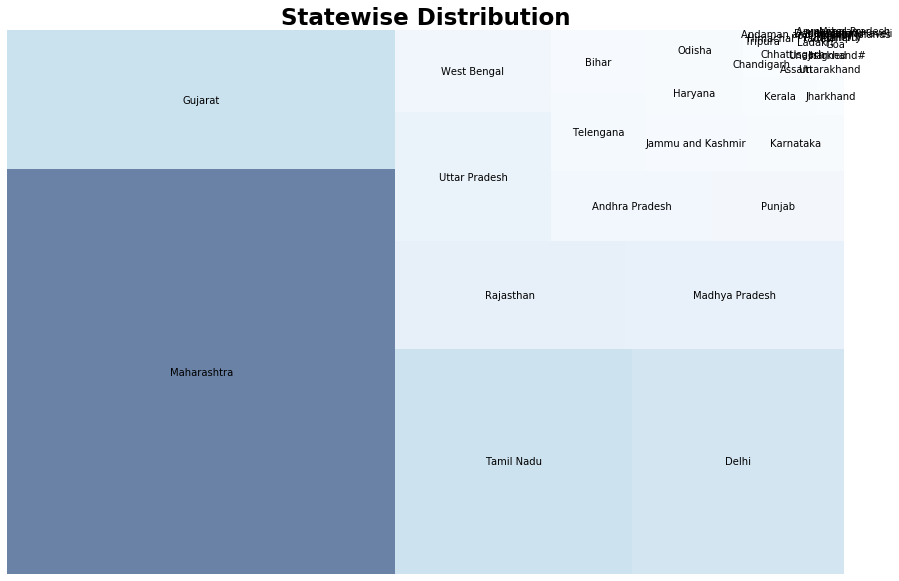

In [31]:
state_details=state_details[state_details.Confirmed != 0]
norm = matplotlib.colors.Normalize(vmin=min(state_details.Confirmed), vmax=max(state_details.Confirmed))
colors = [matplotlib.cm.Blues(norm(value)) for value in state_details.Confirmed]

plt.figure(figsize= (15,10))
fig = plt.gcf()
ax = fig.add_subplot()

squarify.plot(label=list(state_details.index),sizes=state_details.Confirmed, color = colors, alpha=.6)

plt.title("Statewise Distribution",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

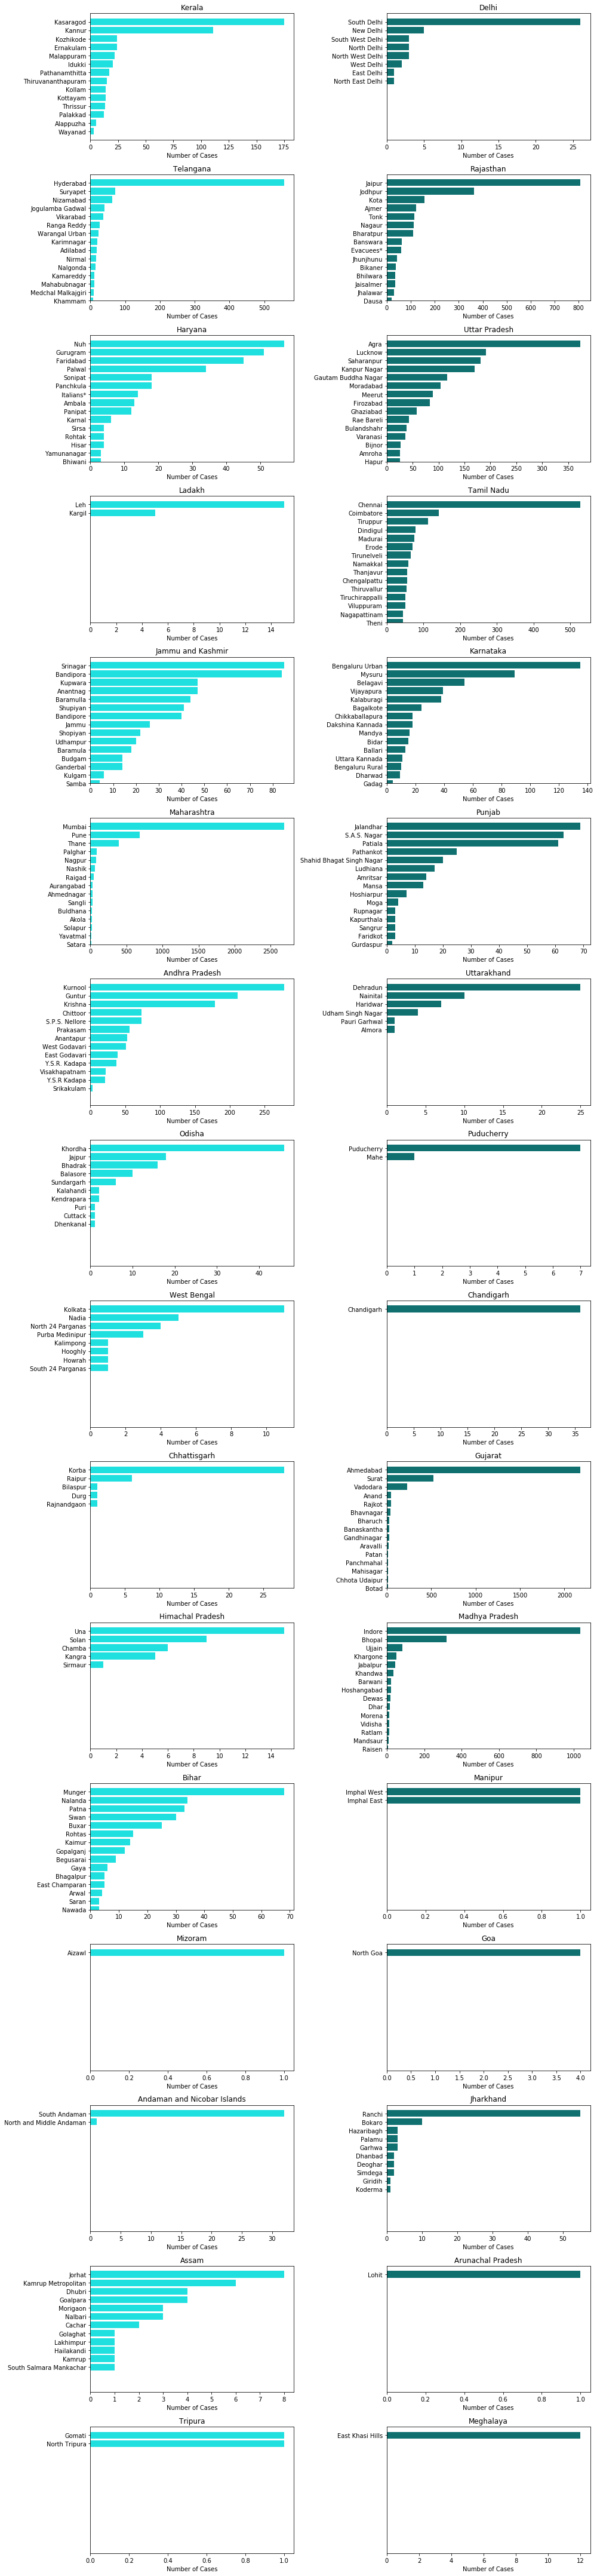

In [32]:
colors_list = ['cyan','teal']
states = individual_details['detected_state'].unique()
if len(states)%2==0:
    n_rows = int(len(states)/2)
else:
    n_rows = int((len(states)+1)/2)    
plt.figure(figsize=(14,60))

for idx,state in enumerate(states):    
    plt.subplot(n_rows,2,idx+1)
    y_order = individual_details[individual_details['detected_state']==state]['detected_district'].value_counts().index
    try:
        g = sns.countplot(data=individual_details[individual_details['detected_state']==state],y='detected_district',orient='v',color=colors_list[idx%2],order=y_order)
        plt.xlabel('Number of Cases')
        plt.ylabel('')
        plt.title(state)
        plt.ylim(14,-1)
    except:
        pass
plt.tight_layout()

In [33]:
# hospital_beds =hospital_beds.drop([36])
cols_object = list(hospital_beds.columns[2:8])

for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')

In [36]:

top_10_primary = hospital_beds.nlargest(10,'NumPrimaryHealthCenters_HMIS')
top_10_community = hospital_beds.nlargest(10,'NumCommunityHealthCenters_HMIS')
top_10_district_hospitals = hospital_beds.nlargest(10,'NumDistrictHospitals_HMIS')
top_10_public_facility = hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10_public_beds = hospital_beds.nlargest(10,'NumPublicBeds_HMIS')

plt.figure(figsize=(15,10))
plt.suptitle('Top 10 States in each Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Primary Health Centers')
plt.barh(top_10_primary['State/UT'],top_10_primary['NumPrimaryHealthCenters_HMIS'],color ='#87479d');

plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['State/UT'],top_10_community['NumCommunityHealthCenters_HMIS'],color = '#9370db');

plt.subplot(224)
plt.title('Total Public Health Facilities')
plt.barh(top_10_community['State/UT'],top_10_public_facility['TotalPublicHealthFacilities_HMIS'],color='#9370db');

plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['State/UT'],top_10_district_hospitals['NumDistrictHospitals_HMIS'],color = '#87479d');



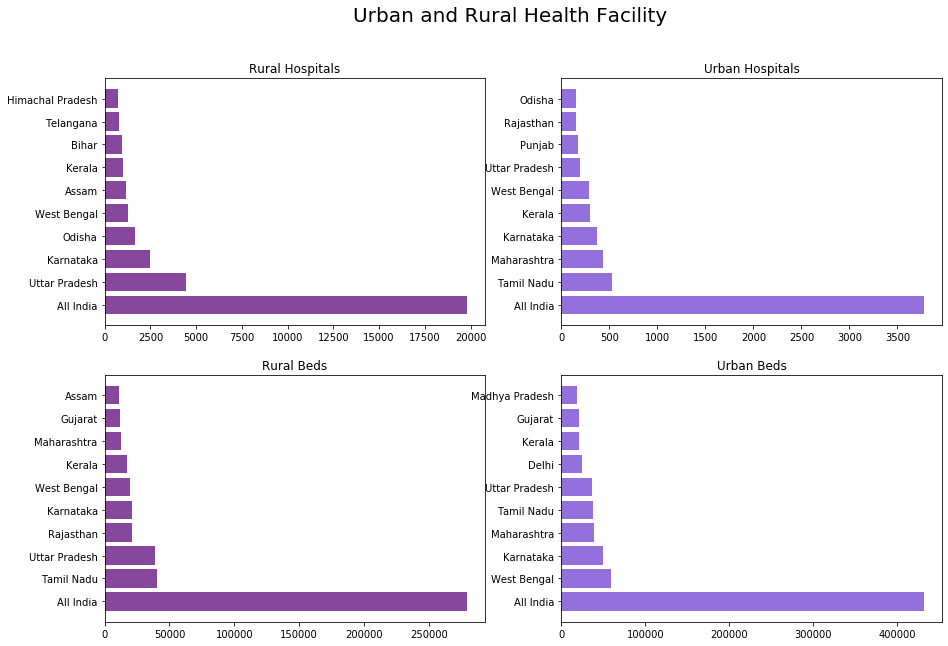

In [37]:
top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#87479d');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#9370db');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#87479d');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#9370db');

In [38]:
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k =df1[df1['Country/Region']=='India'].loc[:,'2/15/20':]
india_confirmed = k.values.tolist()[0] 

growth_diff = []

for i in range(1,len(india_confirmed)):
    growth_diff.append(india_confirmed[i] / india_confirmed[i-1])

growth_factor = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_factor)

Average growth factor 1.1451011157564002


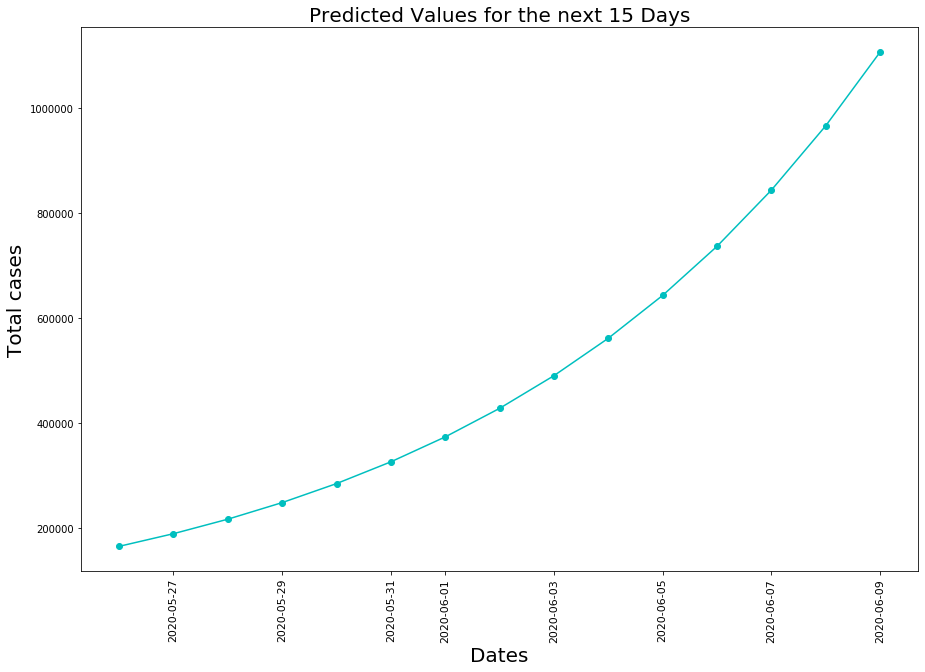

In [39]:
prediction_dates = []

start_date = dates_india[len(dates_india) - 1]
for i in range(15):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
previous_day_cases = global_confirmed[5][len(dates_india) - 1]
predicted_cases = []

for i in range(15):
    predicted_value = previous_day_cases *  growth_factor
    predicted_cases.append(predicted_value)
    previous_day_cases = predicted_value

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)
ax1 = plt.plot_date(y= predicted_cases,x= prediction_dates,linestyle ='-',color = 'c')

In [40]:
state_details = pd.pivot_table(india_covid_19, values=['ConfirmedForeignNational','ConfirmedIndianNational','Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
state_details = state_details.sort_values(by='Confirmed', ascending= False)
# state_details.style.background_gradient(cmap='Blues')

In [41]:
state_details["Total"] = state_details.Confirmed + state_details.Cured + state_details.Deaths

In [42]:
state_details["States/UT"] = state_details.index
state_details.sort_values(by=['States/UT'])
state_details.head()

,Confirmed,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Deaths,Total,States/UT
State/UnionTerritory,,,,,,,
Maharashtra,33053,3,86,7688,1198,41939,Maharashtra
Gujarat,11379,1,7,4499,659,16537,Gujarat
Tamil Nadu,11224,6,7,4172,78,15474,Tamil Nadu
Delhi,10054,1,9,4485,160,14699,Delhi
Rajasthan,5202,2,52,2992,131,8325,Rajasthan


In [43]:
map_data = gpd.read_file("./India_Shape_File/Indian_States.shp")
map_data.rename(columns = {"st_nm":"States/UT"}, inplace = True)
map_data.head()

,States/UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [50]:
map_data["States/UT"] = map_data["States/UT"].str.replace("&","and")

In [51]:
map_data["States/UT"].replace("Arunanchal Pradesh", "Arunachal Pradesh", inplace = True)
map_data["States/UT"].replace("Telangana", "Telengana", inplace = True)
map_data["States/UT"].replace("NCT of Delhi",  "Delhi", inplace = True)
map_data['States/UT'].replace('Andaman and Nicobar Island', 'Andaman and Nicobar Islands',inplace = True)

In [52]:
merged_data = pd.merge(map_data, state_details, how = "left", on = "States/UT")

merged_data.fillna({'mean':0,'count':0,'Confirmed':0,'ConfirmedForeignNational':0,'ConfirmedIndianNational':0,'Cured':0,'Deaths':0,'Total':0}, inplace = True)

In [60]:
merged_data[["States/UT","Confirmed"]].sort_values(by=["Confirmed"],ascending=False).head()


,States/UT,Confirmed
18,Maharashtra,33053.0
9,Gujarat,11379.0
28,Tamil Nadu,11224.0
23,Delhi,10054.0
26,Rajasthan,5202.0


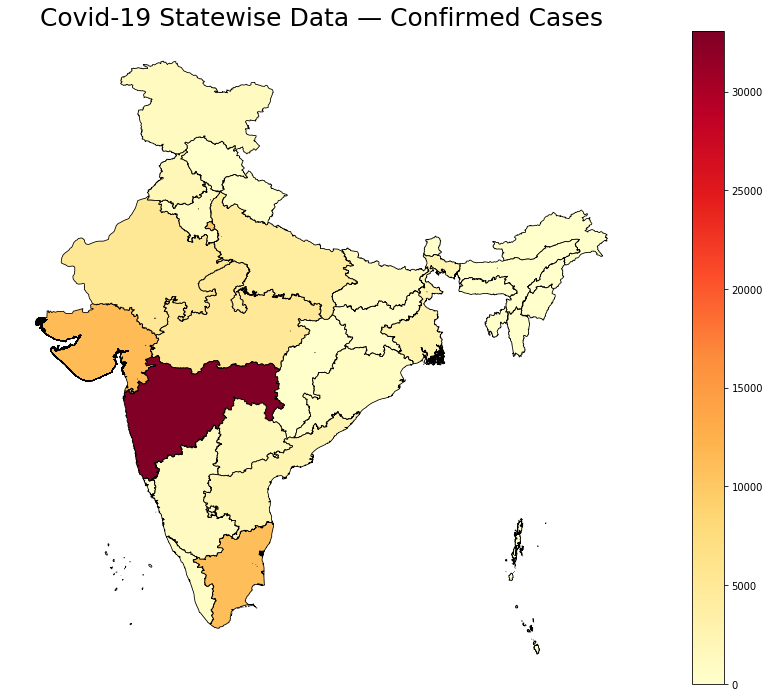

In [53]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis("off")

ax.set_title('Covid-19 Statewise Data — Confirmed Cases', 
             fontdict =  {"fontsize": "25", "fontweight" : "3"})

merged_data.plot(column = "Confirmed", cmap="YlOrRd", 
                 linewidth=0.8, ax=ax, edgecolor="0", 
                 legend = True)
plt.show()

In [54]:
merged_data["ConfirmedIndianNational"].replace('-','0',inplace=True)
merged_data["ConfirmedIndianNational"] = merged_data["ConfirmedIndianNational"].apply(int)

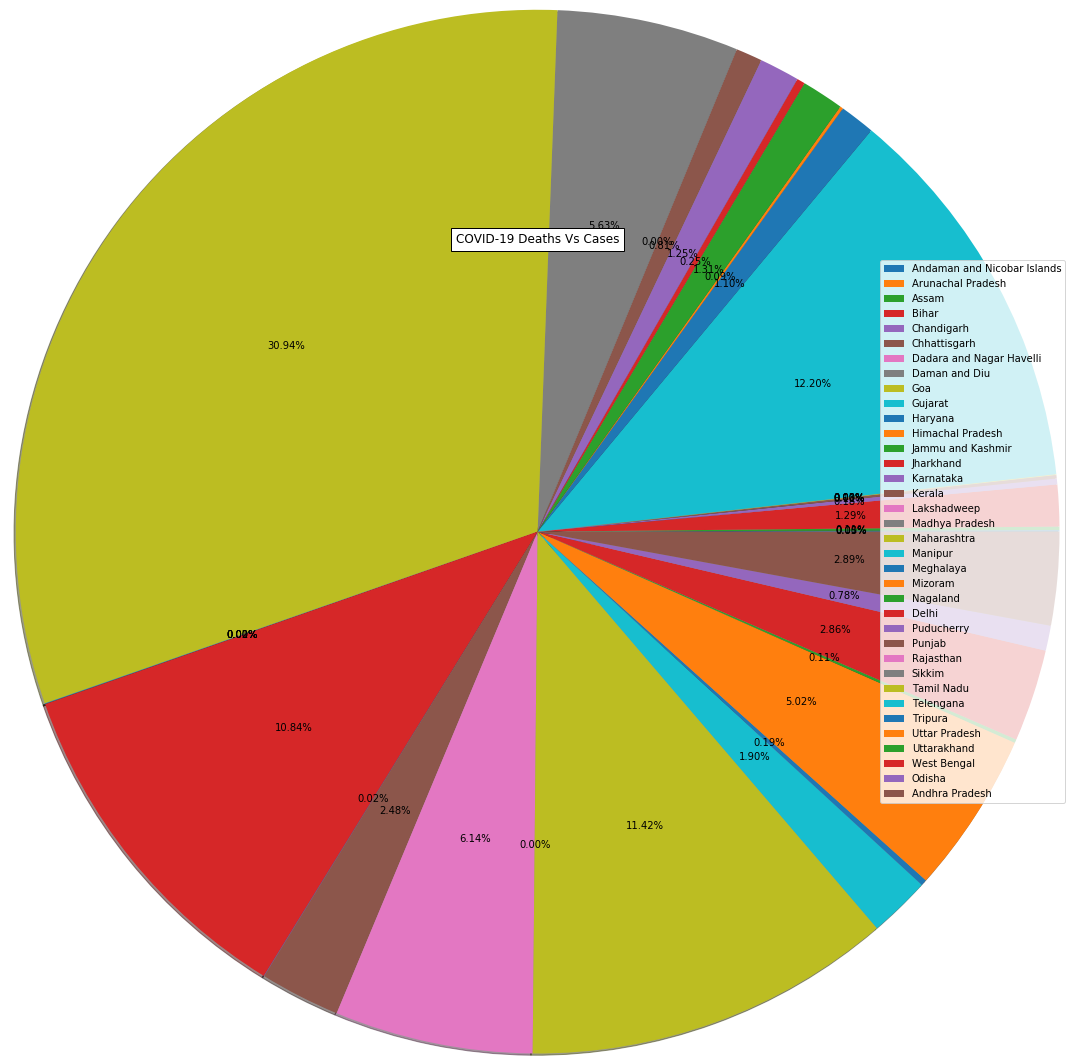

In [55]:
state = merged_data["States/UT"]
cases = merged_data["Total"]

# explode = merged_data.ConfirmedIndianNational.apply(lambda x:x > 100)
# explode = explode.apply(lambda x:0.2 if x == True else 0)

plt.title("COVID-19 Deaths Vs Cases", bbox={"facecolor":"1", "pad":5}).set_position([.5,1.8])
plt.pie(cases,autopct="%1.2f%%",shadow=True, radius=6,)
plt.legend(state, loc="center",bbox_to_anchor=(2.5, 0.5))
plt.show()

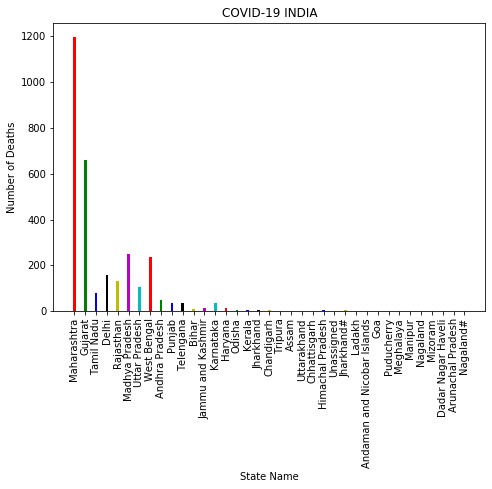

In [56]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(state_details["States/UT"],state_details["Deaths"], color = list("rgbkymc"), width = 0.25)
plt.title("COVID-19 INDIA")
plt.xticks(rotation=90)
plt.xlabel("State Name")
plt.ylabel("Number of Deaths")
plt.show()